In [22]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")

Loading combined annotation: annot


In [2]:
library(readxl)
library(colorspace)

In [3]:
out_dir=paste0(analysisDir,"/99_consolidate/")
dir.create(out_dir)
setwd(out_dir)

Warning message in dir.create(out_dir):
"'/scratch/projects/HTAPP_MBC//phase2/analysis//99_consolidate' already exists"

In [4]:
sp_rep=fread(paste0(projectDir,'/spatial/01_typing/plots/stats.tsv'))
sc=fread(paste0(projectDir,'phase2/PyCache/sc_sn_stats.tsv'),drop = c(1))
annot=as.data.table(read_xlsx(paste0(metaDir,"/clinical features2.xlsx")),)

In [5]:
setnames(sc,c("name","cell_idcount"),c("sample","observations"))
annot[,sample:=paste0(htapp_id,"-",htapp_caseid),]
sp=sp_rep[,.(N=.N,mean_genes=mean(mean_genes),mean_umis=mean(mean_umis),observations=sum(observations)),by=c("sample","method")] #
sp[method=="scRNAseq",N:=NA,]

In [6]:
annot[,receptors_biopsy_simpl:=ifelse(grepl("ER\\+|PR\\+",receptors_biopsy)&grepl("HER2\\+",receptors_biopsy),"HR+/HER2+",
                                     ifelse(grepl("ER\\+|PR\\+",receptors_biopsy)&grepl("HER2\\-",receptors_biopsy),"HR+/HER2-",
                                           ifelse(grepl("ER\\-",receptors_biopsy)&grepl("PR\\-",receptors_biopsy)&grepl("HER2\\+",receptors_biopsy),"HR-/HER2+",
                                                 ifelse(grepl("ER\\-",receptors_biopsy)&grepl("PR\\-",receptors_biopsy)&grepl("HER2\\-",receptors_biopsy),"HR-/HER2-",NA)))),]

In [7]:
head(sp) #
head(sc)
head(annot)

sample,method,N,mean_genes,mean_umis,observations
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
HTAPP-944-SMP-7479,scRNAseq,NA,2350.60154,3448.00060,10016
HTAPP-944-SMP-7479,slide_seq,1,408.56198,565.53460,9422
HTAPP-944-SMP-7479,merfish,3,30.97627,67.93157,31197
HTAPP-944-SMP-7479,merfish_bin,3,47.40024,120.47361,82268
HTAPP-895-SMP-7359,scRNAseq,NA,3769.91481,6990.87000,9958
HTAPP-895-SMP-7359,slide_seq,1,402.29308,607.81450,6210


sample,ccpmID,condition,nCount_RNAmean,nCount_RNAmedian,nCount_RNAmin,nCount_RNAmax,nFeature_RNAmean,nFeature_RNAmedian,nFeature_RNAmin,nFeature_RNAmax,observations
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
HTAPP-225-SMP-6756,0300260T2,TST,2343.823,1917.5,303,14400,1728.932,1574,280,7599,3068
HTAPP-589-SMP-2860,0300294T2,TST,5304.155,4420.0,304,19808,2961.499,2864,160,7973,9935
HTAPP-589-SMP-2851,0300294T3,TST,2667.445,2118.0,312,19579,1895.531,1682,101,7904,7629
HTAPP-231-SMP-6758,0300360T1,TST,2307.658,1707.0,301,19744,1656.089,1390,233,7994,21103
HTAPP-862-SMP-7059,0300376T2,TST,5213.105,4605.5,334,19967,3179.571,3122,269,7806,11432
HTAPP-862-SMP-7060,0300376T3,TST,4480.707,3838.0,349,19914,2876.990,2756,312,7739,10167


ccpm_id,ccpm_id_long,sample,htapp,htapp_id,htapp_caseid,method,site_biopsy,receptors_biopsy,metastatic_presentation,biopsy_days_after_metastasis,histology_breast,known hereditary predisposition,treatment_status,treatment_current_class,treatment_most_recent_class,receptors_biopsy_simpl
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
260,300260,HTAPP-225-SMP-6756,HTAPP,HTAPP-225,SMP-6756,snRNAseq,Breast,ER+/PR+/HER2-,De novo,846,Invasive lobular carcinoma,NA,on-treatment,Endocrine,Endocrine,HR+/HER2-
289,300289,HTAPP-983-SMP-7659,HTAPP,HTAPP-983,SMP-7659,scRNAseq,Liver,ER+/PR+/HER2+,De novo,1466,Invasive ductal carcinoma with mucinous features,ATM,between treatments,off-treatment,Chemotherapy,HR+/HER2+
294,300294,HTAPP-589-SMP-2860,HTAPP,HTAPP-589,SMP-2860,snRNAseq,Liver,ER+/PR-/HER2-,Recurrent,823,Invasive ductal carcinoma,NA,on-treatment,Endocrine + HER2-targeted,Endocrine + HER2-targeted,HR+/HER2-
294,300294,HTAPP-589-SMP-2851,HTAPP,HTAPP-589,SMP-2851,snRNAseq,Brain,ER+/PR-/HER2+,Recurrent,900,Invasive ductal carcinoma,NA,on-treatment,Endocrine,Endocrine,HR+/HER2+
360,300360,HTAPP-231-SMP-6758,HTAPP,HTAPP-231,SMP-6758,snRNAseq,Liver,ER+/PR-/HER2-,Recurrent,675,Invasive ductal carcinoma,NA,between treatments,off-treatment,Immunotherapy,HR+/HER2-
376,300376,HTAPP-862-SMP-7059,HTAPP,HTAPP-862,SMP-7059,snRNAseq,Breast,ER+/PR-/HER2-,De novo,126,Invasive ductal carcinoma,NA,on-treatment,Endocrine,Endocrine,HR+/HER2-


In [8]:
combined=merge(merge(sc[,c("sample","nFeature_RNAmean","nCount_RNAmean","observations")],
                     sp[,c("sample","N","mean_genes","mean_umis","observations","method")],by="sample",all.x = TRUE),
               annot[,-c("ccpm_id","ccpm_id_long","htapp","htapp","htapp_id","htapp_caseid")],by="sample",all.x = TRUE)

In [9]:
combined[!is.na(method.x),observations.x:=observations.y]
combined[!is.na(method.x),nFeature_RNAmean:=mean_genes]
combined[!is.na(method.x),nCount_RNAmean:=mean_umis]#
combined[is.na(method.x)|method.x=="scRNAseq",method.x:=method.y]
combined[,mean_genes:=NULL,]
combined[,mean_umis:=NULL,]
combined[,observations.y:=NULL,]

In [10]:
annot[sample=="HTAPP-997-SMP-7789"]

ccpm_id,ccpm_id_long,sample,htapp,htapp_id,htapp_caseid,method,site_biopsy,receptors_biopsy,metastatic_presentation,biopsy_days_after_metastasis,histology_breast,known hereditary predisposition,treatment_status,treatment_current_class,treatment_most_recent_class,receptors_biopsy_simpl
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
861,300861,HTAPP-997-SMP-7789,HTAPP,HTAPP-997,SMP-7789,snRNAseq,Liver,ER+/PR-/HER2-,Recurrent,4659,Invasive ductal carcinoma,TP53,between treatments,off-treatment,Chemotherapy,HR+/HER2-


In [11]:
head(combined)#

sample,nFeature_RNAmean,nCount_RNAmean,observations.x,N,method.x,method.y,site_biopsy,receptors_biopsy,metastatic_presentation,biopsy_days_after_metastasis,histology_breast,known hereditary predisposition,treatment_status,treatment_current_class,treatment_most_recent_class,receptors_biopsy_simpl
<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HTAPP-211-SMP-6751,1958.3457,2722.899,16109,NA,snRNAseq,snRNAseq,Liver,ER-/PR-/HER2-,Recurrent,482,Invasive ductal carcinoma,NA,on-treatment,Chemotherapy,Chemotherapy,HR-/HER2-
HTAPP-213-SMP-6752,2150.0205,3152.170,9799,NA,snRNAseq,snRNAseq,Chest wall,ER-/PR-/HER2-,Recurrent,153,Invasive ductal carcinoma,NA,between treatments,off-treatment,Chemotherapy,HR-/HER2-
HTAPP-213-SMP-6752,168.0981,206.080,9362,2,slide_seq,snRNAseq,Chest wall,ER-/PR-/HER2-,Recurrent,153,Invasive ductal carcinoma,NA,between treatments,off-treatment,Chemotherapy,HR-/HER2-
HTAPP-213-SMP-6752,48.4531,34286.920,26685,1,codex,snRNAseq,Chest wall,ER-/PR-/HER2-,Recurrent,153,Invasive ductal carcinoma,NA,between treatments,off-treatment,Chemotherapy,HR-/HER2-
HTAPP-223-SMP-6755,1990.8397,3057.134,14912,NA,snRNAseq,snRNAseq,Liver,ER-/PR-/HER2+,Recurrent,35,Invasive ductal carcinoma,NA,on-treatment,Chemotherapy,Chemotherapy,HR-/HER2+
HTAPP-223-SMP-7537,2534.2845,3528.597,12994,NA,snRNAseq,snRNAseq,Liver,ER-/PR-/HER2-,Recurrent,346,Invasive ductal carcinoma,NA,on-treatment,Chemotherapy + HER2-targeted,Chemotherapy + HER2-targeted,HR-/HER2-


In [12]:
combined[,receptors_biopsy_simpl:=paste0(" ",receptors_biopsy_simpl),]
combined[,receptors_biopsy_simpl:=factor(receptors_biopsy_simpl,levels=c(" HR+/HER2-", " HR+/HER2+", " HR-/HER2+", " HR-/HER2-")),]
combined[,site_biopsy:=paste0("  ",site_biopsy),]

combined[,sample:=factor(sample,levels=unique(sample[order(method.y,receptors_biopsy_simpl,site_biopsy,sample)])),]
combined[,method.x:=factor(method.x,levels=c("scRNAseq","snRNAseq","codex","slide_seq","merfish","merfish_bin","exseq","exseq_bin")),]

In [13]:
write.table(combined,"all_stats_meta.tsv",sep="\t",quote=F,row.names=F)

In [ ]:
#order: HR+/HER2- then HR+/HER2+ then HR-/HER2+ then HR-/HER2-


In [23]:
#adding the spaces to order tissues and receptors (like above)
names(rc_colors)=paste0(" ",names(rc_colors))
names(ti_colors)=paste0("  ",names(ti_colors))

In [24]:
all_maps=c(rc_colors,ti_colors)

In [25]:
all_maps=c(all_maps,c(" NA"="white"))

In [105]:
summary(combined$nFeature_RNAmean)
summary(combined$observations.x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.57   47.90  758.59 1185.15 2348.11 3769.91 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    423    3798    9648   11954   12735   82268 

In [110]:
pl=ggplot(data=combined)+
geom_point(aes(x=sample,y=method.x,size=observations.x,col=nFeature_RNAmean))+
geom_text(aes(x=sample,y=method.x,label=N),color="black",size=2)+
#geom_tile(aes(x=sample,y=0,fill=method.y))+
geom_tile(aes(x=sample,y=-1,fill=receptors_biopsy_simpl))+
geom_tile(aes(x=sample,y=-2,fill=site_biopsy))+
#geom_tile(aes(x=sample,y=-3,fill=treatment_most_recent_class))+
rotate_labels()+
scale_fill_manual(values=all_maps)+
scale_color_gradient(high="#031054",low="#dbe1ff",breaks=c(28,60,500,1000,2000,3760))+
scale_size_continuous(range = c(2,7),breaks=c(423,1000,5000,10000,40000,82260))+
theme(legend.position="bottom")+
guides(fill=guide_legend(ncol=5,title.position = "top"))+
guides(size=guide_legend(ncol=2,title.position = "top"))+
guides(col=guide_legend(title.position = "top"))

Warning message:
"Removed 67 rows containing missing values (geom_text)."

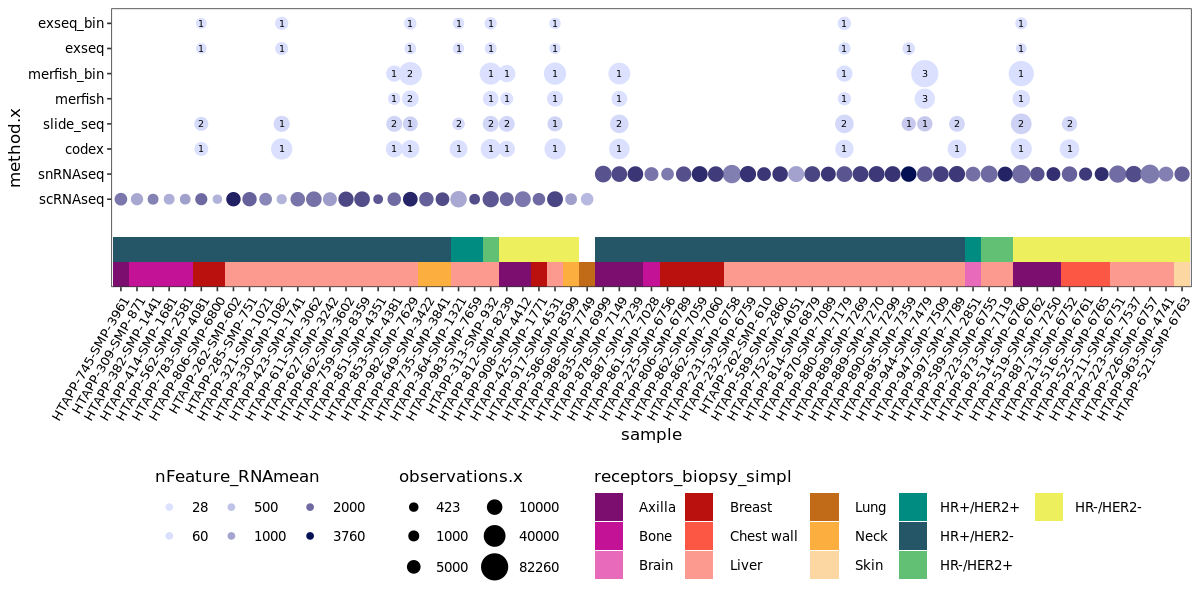

In [111]:
options(repr.plot.width = 10, repr.plot.height =5)
pl

In [112]:
pdf("data_overview.pdf",width = 10,height = 5)
pl
dev.off()

Warning message:
"Removed 67 rows containing missing values (geom_text)."

png 
  2

In [6]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /secure/src/anaconda3/envs/s3/lib/libopenblasp-r0.3.7.so

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] colorspace_1.4-1   readxl_1.3.1       Seurat_3.1.1       simpleCache_0.4.1 
[5] RColorBrewer_1.1-2 gtools_3.8.1       ggplot2_3.2.1      data.table_1.12.6 
[9] reticulate_1.16   

loaded via a namespace (and not attached):
 [1] tsne_0.1-3          nlme_3.1-141        bitops_1.0-6       
 [4] RcppAnnoy_0.0.13    httr_1.4.2          repr_1.0.1         
 [7] sctransform_0.2.0   tools_3.6.3         backports_1.1.5    
[10] R6_2.4.0            irlba_2.3.3         KernSmooth_2.23-16 
[13] uwot_0.1.4          lazyeval_0.2.2      npsurv_0.4-0       
[16] withr_2.3.0         gridExtra_2.3       tidyselect_0.2.5   
[19] compile